In [1]:
from chebGreen import ChebGreen
import numpy as np
import matplotlib.pyplot as plt

from chebGreen.chebpy2 import Quasimatrix
from chebGreen.chebpy2.chebpy import chebfun
from chebGreen.chebpy2 import Chebfun2

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
Theta = [1.0,2.0,3.0]
domain = [-1,1,-1,1]
generateData = True
script = "generate_example"
example = "mean_condition"
dirichletBC = False
mean = ChebGreen(Theta, domain, generateData, script, example, dirichletBC)

Generating dataset for example 'mean_condition'
Dataset found for Theta = 1.00. Skipping dataset generation.
Dataset found for Theta = 2.00. Skipping dataset generation.
Dataset found for Theta = 3.00. Skipping dataset generation.
-------------------------------------------------------------------------------

Generating chebfun2 models:
Found saved model, Loading model for example 'mean_condition' at Theta = 1.00
Learning a chebfun model for example 'mean_condition' at Theta = 1.00
Chebfun model added for example 'mean_condition' at Theta = 1.00

Found saved model, Loading model for example 'mean_condition' at Theta = 2.00
Learning a chebfun model for example 'mean_condition' at Theta = 2.00
Chebfun model added for example 'mean_condition' at Theta = 2.00

Found saved model, Loading model for example 'mean_condition' at Theta = 3.00
Learning a chebfun model for example 'mean_condition' at Theta = 3.00
Chebfun model added for example 'mean_condition' at Theta = 3.00



CPU times: user 42.3 s, sys: 1min 20s, total: 2min 2s
Wall time: 25.4 s


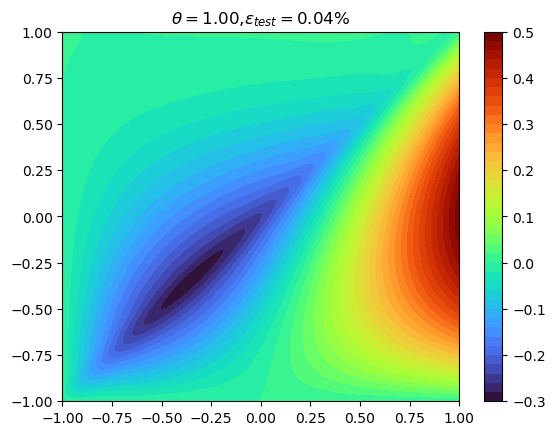

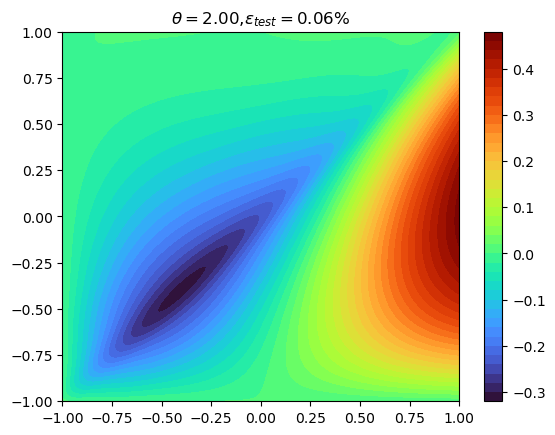

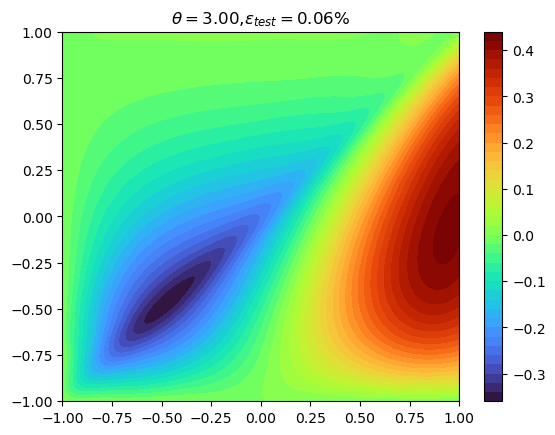

In [3]:
%%time
for t in Theta:
    fig = plt.figure()
    mean.G[t].plot(fig = fig)
    error = mean.computeEmpiricalError(t)
    plt.title(f"$\\theta = {{{t:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

In [4]:
%%time
U, S, V = [],[],[]
for t in Theta:
    u,s,v = mean.G[t].svd()
    U.append(u)
    S.append(s)
    V.append(v)

CPU times: user 4.3 s, sys: 8.53 s, total: 12.8 s
Wall time: 1.56 s


In [5]:
t = 0
u,s,v = U[t],S[t],V[t]

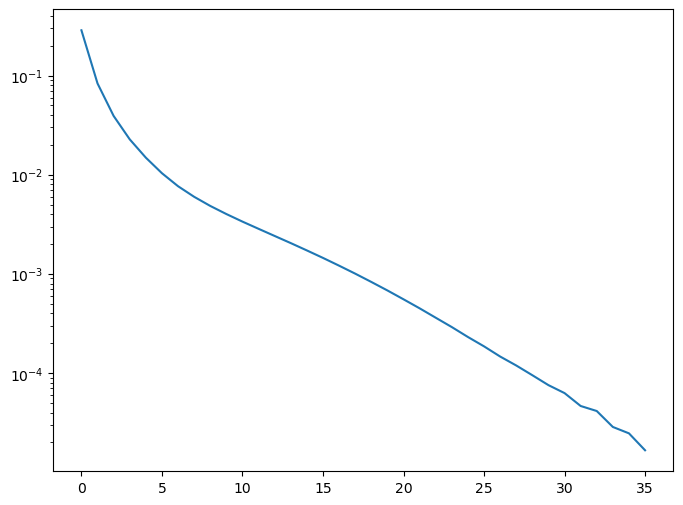

In [6]:
fig = plt.figure(figsize = (8,6))
plt.semilogy(s)

(-1.0, 1.0)

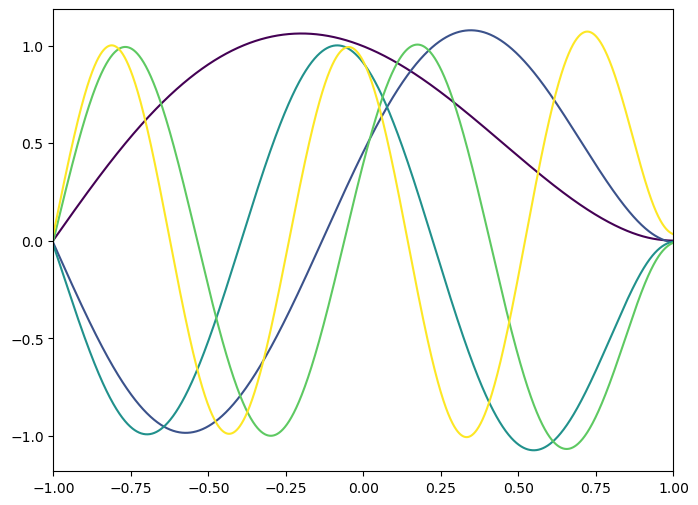

In [7]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([-1,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [4]:
%%time
theta_ = 2.5
Ginterp, Ninterp = mean.generateNewModel(theta_)

CPU times: user 11.2 s, sys: 20.7 s, total: 31.9 s
Wall time: 3.53 s


In [5]:
Ginterp

chebfun2 object
     domain       rank               corner values
[-1.0,1.0] x [-1.0,1.0]     36       [0.010 0.003 -0.002 0.010]
vertical scale = 0.450467

In [10]:
%%time
u,s,v = Ginterp.svd()

CPU times: user 2.12 s, sys: 3.43 s, total: 5.55 s
Wall time: 708 ms


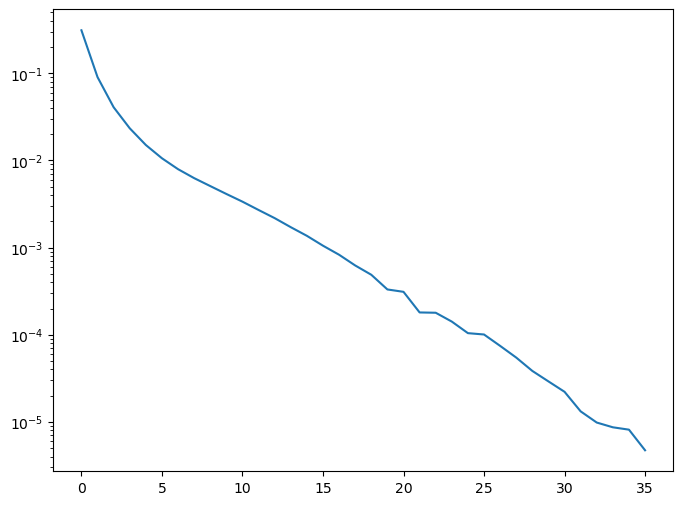

In [11]:
fig = plt.figure(figsize = (8,6))
plt.semilogy(s)

(-1.0, 1.0)

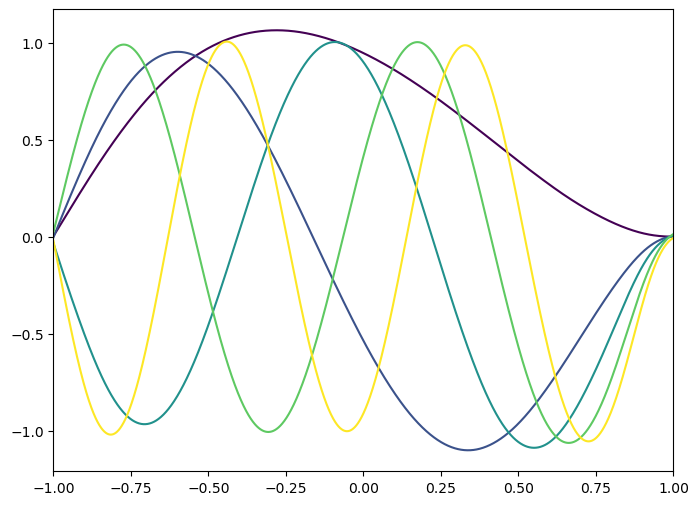

In [12]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([-1,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [6]:
validation = ChebGreen([theta_], domain, generateData, script, example, dirichletBC)

Generating dataset for example 'mean_condition'
Dataset found for Theta = 2.50. Skipping dataset generation.
-------------------------------------------------------------------------------

Generating chebfun2 models:
Found saved model, Loading model for example 'mean_condition' at Theta = 2.50
Learning a chebfun model for example 'mean_condition' at Theta = 2.50
Chebfun model added for example 'mean_condition' at Theta = 2.50



Assuming a zero homogeneous solution.


Text(0.5, 1.0, 'Interpolated Model $\\theta = {2.50}$,$\\epsilon_{test} = {100.00}\\%$')

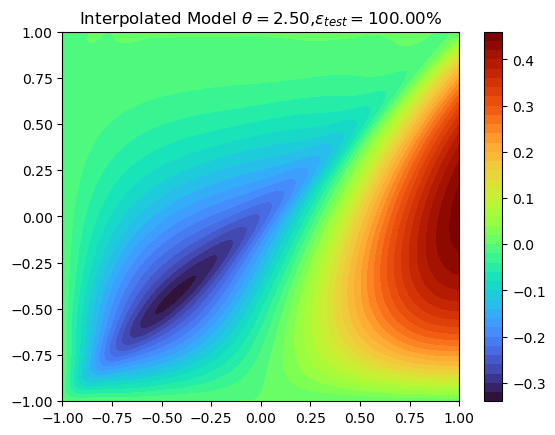

In [7]:
fig = plt.figure()
Ginterp.plot(fig = fig)
error = mean.computeEmpiricalError(theta_)
plt.title(f"Interpolated Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

Text(0.5, 1.0, 'Validation Model $\\theta = {2.50}$,$\\epsilon_{test} = {0.17}\\%$')

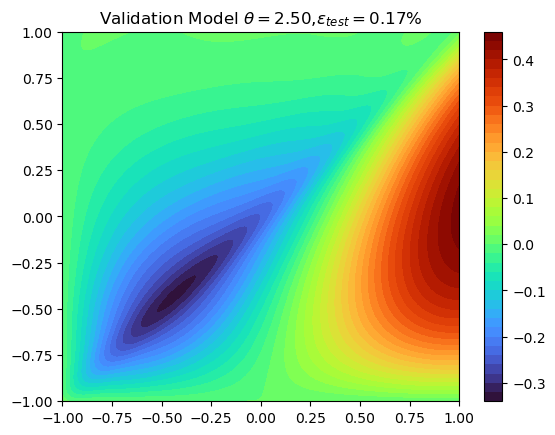

In [8]:
fig = plt.figure()
validation.G[theta_].plot(fig = fig)
error = validation.computeEmpiricalError(theta_)
plt.title(f"Validation Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

In [15]:
def compareGreen1D(interpModel, exactModel, vmin = None, vmax = None):
    domain = interpModel.domain
    xx = np.linspace(domain[2],domain[3],2000)
    yy = np.linspace(domain[0],domain[1],2000)
    x, s = np.meshgrid(xx,yy)
    
    if vmin is None:
        vmin = min(interpModel.min,exactModel.min)
    if vmax is None:
        vmax = max(interpModel.max,exactModel.max)
        
    plt.figure(figsize = (16,6))
    plt.subplot(121)
    
    GInterp = interpModel[x,s]
    
    levels = np.linspace(vmin, vmax, 50, endpoint = True)
    ticks = np.linspace(vmin, vmax, 10, endpoint=True)
    
    surf = plt.contourf(x, s, GInterp, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    plt.gca().set_aspect('equal', adjustable='box')
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('$x$', fontsize = 11)
    plt.ylabel('$s$', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Interpolated", fontsize = 14)
    
    GExact = exactModel[x,s]
    
    plt.subplot(122)
    plt.gca().set_aspect('equal', adjustable='box')
    surf = plt.contourf(x, s, GExact, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('x', fontsize = 11)
    plt.ylabel('s', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Data", fontsize = 14)

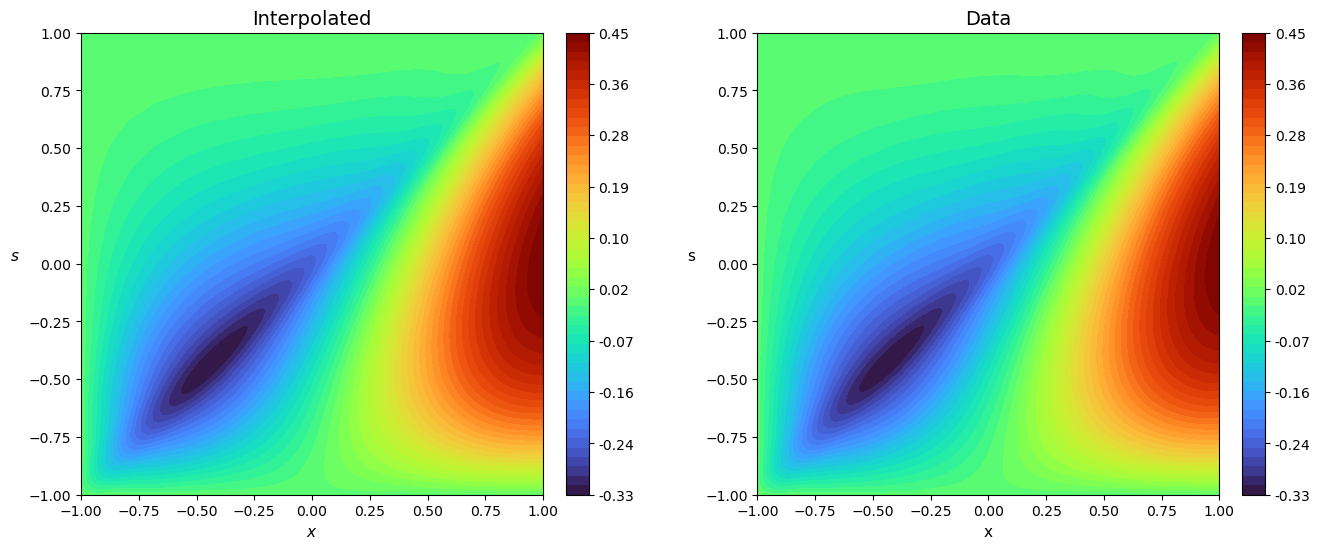

In [16]:
compareGreen1D(Ginterp,validation.G[theta_])

In [ ]:
# vmin, vmax = -0.4,0.5
# theta = Theta[0]
# G = mean.G[theta]

# xx = np.linspace(domain[0],domain[1],2000)
# yy = np.linspace(domain[2],domain[3],2000)
# x, y = np.meshgrid(xx,yy)
# G = G[x,y]

# fig = plt.figure(figsize = (13,10), frameon=False)
# plt.axis('off')
# plt.gca().set_aspect('equal', adjustable='box')
# levels = np.linspace(vmin, vmax, 50, endpoint = True)
# plt.contourf(x,y,G, levels = levels, cmap = 'jet', vmin = vmin, vmax = vmax)
# # ticks = np.linspace(vmin, vmax, 10, endpoint=True)
# # cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)

# fig.savefig('interp-A.png', dpi = fig.dpi, bbox_inches='tight', pad_inches=0)